In [1]:
#import all require libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Read the dataset
password_strength = pd.read_csv("data (2).csv" , error_bad_lines=False)
password_strength.head()

Skipping line 2810: expected 2 fields, saw 5
Skipping line 4641: expected 2 fields, saw 5
Skipping line 7171: expected 2 fields, saw 5
Skipping line 11220: expected 2 fields, saw 5
Skipping line 13809: expected 2 fields, saw 5
Skipping line 14132: expected 2 fields, saw 5
Skipping line 14293: expected 2 fields, saw 5
Skipping line 14865: expected 2 fields, saw 5
Skipping line 17419: expected 2 fields, saw 5
Skipping line 22801: expected 2 fields, saw 5
Skipping line 25001: expected 2 fields, saw 5
Skipping line 26603: expected 2 fields, saw 5
Skipping line 26742: expected 2 fields, saw 5
Skipping line 29702: expected 2 fields, saw 5
Skipping line 32767: expected 2 fields, saw 5
Skipping line 32878: expected 2 fields, saw 5
Skipping line 35643: expected 2 fields, saw 5
Skipping line 36550: expected 2 fields, saw 5
Skipping line 38732: expected 2 fields, saw 5
Skipping line 40567: expected 2 fields, saw 5
Skipping line 40576: expected 2 fields, saw 5
Skipping line 41864: expected 2 field

Skipping line 525174: expected 2 fields, saw 5
Skipping line 526251: expected 2 fields, saw 5
Skipping line 529611: expected 2 fields, saw 5
Skipping line 531398: expected 2 fields, saw 5
Skipping line 534146: expected 2 fields, saw 5
Skipping line 544954: expected 2 fields, saw 5
Skipping line 553002: expected 2 fields, saw 5
Skipping line 553883: expected 2 fields, saw 5
Skipping line 553887: expected 2 fields, saw 5
Skipping line 553915: expected 2 fields, saw 5
Skipping line 554172: expected 2 fields, saw 5
Skipping line 563534: expected 2 fields, saw 5
Skipping line 565191: expected 2 fields, saw 5
Skipping line 574108: expected 2 fields, saw 5
Skipping line 574412: expected 2 fields, saw 5
Skipping line 575985: expected 2 fields, saw 5
Skipping line 580091: expected 2 fields, saw 5
Skipping line 582682: expected 2 fields, saw 5
Skipping line 585885: expected 2 fields, saw 5
Skipping line 590171: expected 2 fields, saw 5
Skipping line 591924: expected 2 fields, saw 5
Skipping line

password  strength
0     kzde5577         1
1     kino3434         1
2    visi7k1yr         1
3     megzy123         1
4  lamborghin1         1

In [3]:
#Checking the null values
password_strength.isnull().sum()

password    1
strength    0
dtype: int64

In [4]:
#drop the null values
password_strength.dropna(inplace = True)

In [5]:
#Checking the null values
password_strength.isnull().sum()

password    0
strength    0
dtype: int64

In [6]:
#Statistical description
password_strength.describe()

strength
count  669639.000000
mean        0.990198
std         0.507947
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         2.000000

In [21]:
#checking the columns
password_strength.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 669639 entries, 0 to 669639
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   password  669639 non-null  object
 1   strength  669639 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 15.3+ MB


In [7]:
#Password Tuple
password_tuple = np.array(password_strength)

In [8]:
password_tuple

array([['kzde5577', 1],
       ['kino3434', 1],
       ['visi7k1yr', 1],
       ...,
       ['184520socram', 1],
       ['marken22a', 1],
       ['fxx4pw4g', 1]], dtype=object)

In [9]:
#random shuffle
import random
random.shuffle(password_tuple)

In [10]:
# Extract labels from password_tuple 
y = [labels[1] for labels in password_tuple ]

In [11]:
#Extract labels from password_tuple
x = [labels[0] for labels in password_tuple ]

<AxesSubplot:xlabel='strength', ylabel='count'>

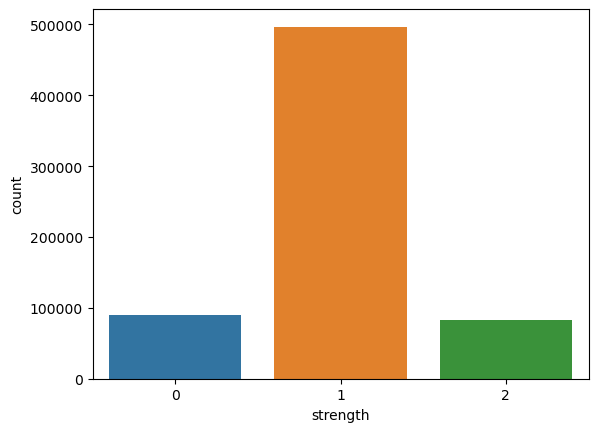

In [76]:
#Countplot for Strength
sns.countplot(x = 'strength' , data = password_strength)

In [12]:
#Define word_char
def word_char(inputs):
    a= []
    for i in inputs:
        a.append(i)
    return a

In [13]:
#Tfid
vect = TfidfVectorizer(tokenizer = word_char)
x =vect.fit_transform(x)

In [14]:
#Shape of x
x.shape

(669639, 129)

In [15]:
#Split the dataset
from sklearn.model_selection import train_test_split
X_train,X_test ,y_train,y_test = train_test_split(x,y,test_size = 0.20,random_state = 42)

In [16]:
# Standardize features
scaler = StandardScaler(with_mean=False)  # Use with_mean=False for sparse matrices
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)


In [47]:
#Print the result
print("Logistic Regression")
print("Accuracy:", accuracy_score(y_test, lr_predictions))
print("Classification Report:")
print(classification_report(y_test, lr_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))

Logistic Regression
Accuracy: 0.8197389642195807
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.31      0.41     18026
           1       0.84      0.93      0.88     99434
           2       0.81      0.69      0.75     16468

    accuracy                           0.82    133928
   macro avg       0.74      0.65      0.68    133928
weighted avg       0.80      0.82      0.80    133928

Confusion Matrix:
[[ 5651 12360    15]
 [ 4027 92752  2655]
 [   21  5064 11383]]


In [90]:
# AdaBoost
adaboost_model = AdaBoostClassifier()
adaboost_model.fit(X_train_scaled, y_train)
adaboost_predictions = adaboost_model.predict(X_test_scaled)
adaboost_accuracy = accuracy_score(y_test, adaboost_predictions)


In [48]:
# Accuracy, Classification Report and Confusion Matrix for AdaBoost
print("AdaBoost")
print("Accuracy:", accuracy_score(y_test, adaboost_predictions))
print("Classification Report:")
print(classification_report(y_test, adaboost_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, adaboost_predictions))

AdaBoost
Accuracy: 0.8329624873066125
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.13      0.23     18026
           1       0.82      0.99      0.90     99434
           2       0.96      0.66      0.78     16468

    accuracy                           0.83    133928
   macro avg       0.85      0.59      0.64    133928
weighted avg       0.83      0.83      0.79    133928

Confusion Matrix:
[[ 2376 15650     0]
 [  694 98335   405]
 [    2  5620 10846]]


In [49]:
# XGBoost
xgb_model = XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)
xgb_predictions = xgb_model.predict(X_test_scaled)

In [50]:
# Accuarcy, Classification Report and Confusion Matrix for XGBoost
print("XGBoost")
print("Accuracy:", accuracy_score(y_test, xgb_predictions))
print("Classification Report:")
print(classification_report(y_test, xgb_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, xgb_predictions))

XGBoost
Accuracy: 0.9868735439937877
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     18026
           1       0.99      0.99      0.99     99434
           2       0.99      0.98      0.99     16468

    accuracy                           0.99    133928
   macro avg       0.98      0.98      0.98    133928
weighted avg       0.99      0.99      0.99    133928

Confusion Matrix:
[[17281   745     0]
 [  528 98753   153]
 [    4   328 16136]]


In [18]:
# MLP Classifier
mlp_classifier = MLPClassifier(random_state=42)
mlp_classifier.fit(X_train, y_train)
mlp_predictions = mlp_classifier.predict(X_test)

In [19]:
#Accuracy, classification report and confusion matrix for MLP
print("MLP")
print("Accuracy:", accuracy_score(y_test, mlp_predictions))
print("Classification Report:")
print(classification_report(y_test, mlp_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, mlp_predictions))

MLP
Accuracy: 0.985283137208052
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     17974
           1       0.99      0.99      0.99     99559
           2       0.99      0.96      0.97     16395

    accuracy                           0.99    133928
   macro avg       0.98      0.97      0.98    133928
weighted avg       0.99      0.99      0.99    133928

Confusion Matrix:
[[17386   588     0]
 [  495 98849   215]
 [    2   671 15722]]


In [88]:
# Convert sparse matrix to dense matrix
X_train_dense = X_train.toarray()
X_test_dense = X_test.toarray()

# Pad the sequences to a fixed length
max_sequence_length = 100  
X_train_padded = pad_sequences(X_train_dense, maxlen=max_sequence_length, padding='post', truncating='post')
X_test_padded = pad_sequences(X_test_dense, maxlen=max_sequence_length, padding='post', truncating='post')

# Convert y_train to a NumPy array
y_train_np = np.array(y_train)

# Create the LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_sequence_length))
lstm_model.add(SpatialDropout1D(0.2))
lstm_model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
lstm_model.fit(X_train_padded, y_train_np, epochs=5, batch_size=64, validation_split=0.2) # Adding validation split

# Make predictions and evaluate the model
lstm_predictions = lstm_model.predict(X_test_padded)
lstm_predictions = [1 if pred > 0.5 else 0 for pred in lstm_predictions]



Epoch 1/5
6697/6697 [==============================] - 3106s 463ms/step - loss: 0.0618 - accuracy: 0.7419 - val_loss: 0.0586 - val_accuracy: 0.7414
Epoch 2/5
6697/6697 [==============================] - 2416s 361ms/step - loss: 0.0605 - accuracy: 0.7419 - val_loss: 0.0587 - val_accuracy: 0.7414
Epoch 3/5
6697/6697 [==============================] - 2248s 336ms/step - loss: 0.0601 - accuracy: 0.7419 - val_loss: 0.0615 - val_accuracy: 0.7414
Epoch 4/5
6697/6697 [==============================] - 2293s 342ms/step - loss: 0.0604 - accuracy: 0.7419 - val_loss: 0.0599 - val_accuracy: 0.7414
Epoch 5/5
4186/4186 [==============================] - 165s 39ms/step


In [91]:
# Print Accuracy, classification report and confusion matrix for LSTM
print("LSTM")
print("Accuracy:", accuracy_score(y_test, lstm_predictions))
print("Classification Report:")
print(classification_report(y_test, lstm_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lstm_predictions))

LSTM
Accuracy: 0.7424437010931246
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     18026
           1       0.74      1.00      0.85     99434
           2       0.00      0.00      0.00     16468

    accuracy                           0.74    133928
   macro avg       0.25      0.33      0.28    133928
weighted avg       0.55      0.74      0.63    133928

Confusion Matrix:
[[    0 18026     0]
 [    0 99434     0]
 [    0 16468     0]]


In [20]:
#Comparaison table
data = {
    "Algorithm": ["Logistic Regression", "Adaboost", "XGBoost", "MLP", "LSTM"],
    "Accuracy": [0.8197389642195807, 0.8329624873066125, 0.9868735439937877,  0.985283137208052, 0.7424437010931246]
}

df = pd.DataFrame(data)

print(df)

             Algorithm  Accuracy
0  Logistic Regression  0.819739
1             Adaboost  0.832962
2              XGBoost  0.986874
3                  MLP  0.985283
4                 LSTM  0.742444
